# Bonds

In [2]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
class zeroCouponBonds:
  def __init__(self,price,interest_rate,maturity):
    self.price=price
    self.interest_rate=interest_rate/100
    self.maturity=maturity

  def presentValue(self,x,n):
    return x/(1+self.interest_rate)**n

  def calculatePrice(self):
    return self.presentValue(self.price,self.maturity)

if __name__=='__main__':
  bond = zeroCouponBonds(1000,2,4)
  print(f"The Price of the ZeroCoupon bond is {bond.calculatePrice()}")


The Price of the ZeroCoupon bond is 923.8454260265142


In [ ]:
import math
class couponBond:
  def __init__(self,principal,interest_rate,maturity,bond_rate):
    self.principal=principal
    self.interest_rate=interest_rate/100
    self.maturity=maturity
    self.bond_rate=bond_rate/100

  def presentValue(self,x,n):
    return x/(1+self.interest_rate)**n

  def presentValueCont(self,x,n):
    return x*math.exp(-self.interest_rate*n)

  def calculatePrice(self):
    price = 0
    for i in range(1,self.maturity+1):
      price += self.presentValueCont(self.principal*self.bond_rate, i)

    price+=self.presentValueCont(self.principal,self.maturity)
    return price
    # gp = 1/(1+self.interest_rate)
    # c = (self.bond_rate*self.principal)
    # return self.presentValue(self.principal,self.maturity)+ c*gp*(1-gp**(self.maturity-1))/(1-gp)

  def ytm(self,t,y):
    val = 0
    for i in range(1,1+t):
      val+=self.principal*self.bond_rate*math.exp(y*i)
    val+=self.principal*math.exp(y*self.maturity)

  # def presentValue(self,x,n):
  #   c = x*self.bond_rate
  #   gp = 1/(1+self.interest_rate)
  #   if n==self.maturity:
  #     return (c*(1-gp**n))/(1-gp) + self.principal/(1+self.interest_rate)**n - c
  #   else:
  #     return (c*(1-gp**n))/(1-gp)

  # def calculatePrice(self):
  #   return self.presentValue(self.principal,self.maturity)

if __name__ == '__main__':
  c_bond = couponBond(1000,4,3,10)
  print(f"The price={c_bond.calculatePrice()}")


The price=1164.0030589427693


# Modern Portfolio Theory
---

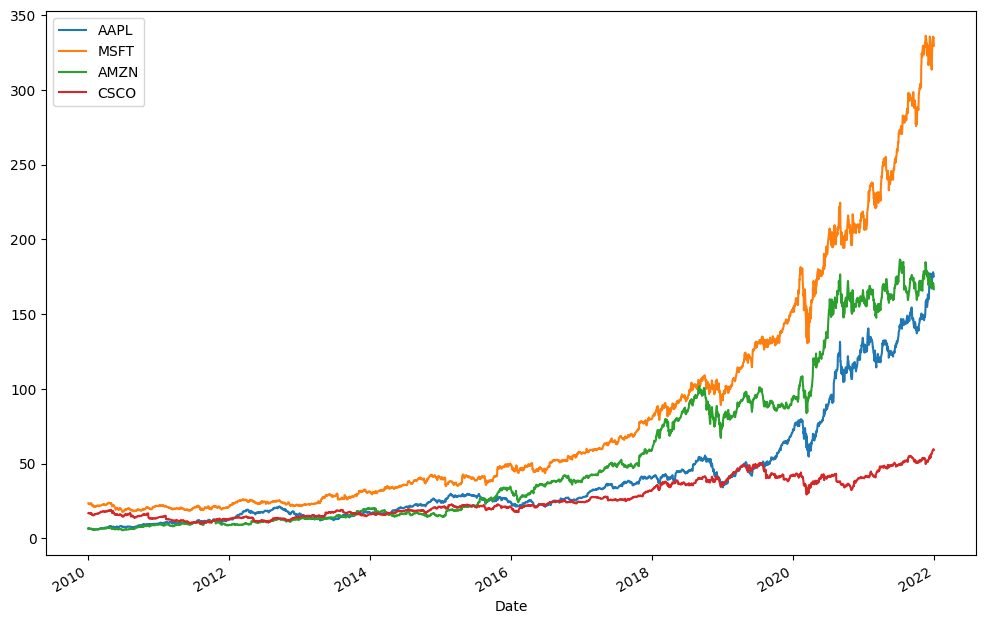

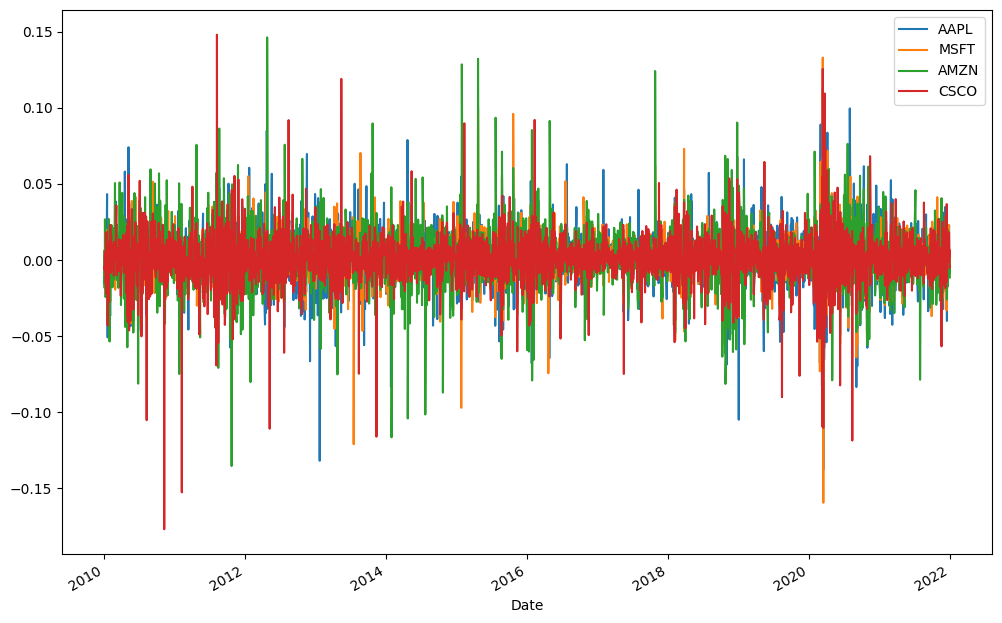

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['AAPL','MSFT','AMZN','CSCO']
start_date = '2010-01-01'
end_date = '2022-01-01'

def download_data():
  market = {}
  for stock in stocks:
    ticker = yf.Ticker(stock)
    market[stock]=ticker.history(start=start_date,end=end_date)['Close']
  return pd.DataFrame(market)

def calculateReturns(data):
  log_return = np.log(data/data.shift(1))
  return pd.DataFrame(log_return)

if __name__ == '__main__':
  market = download_data()
  market.plot(figsize=(12,8))
  plt.show()

  returns = calculateReturns(market)
  returns.plot(figsize=(12,8))
  plt.show()




**Return of a Stock:** \
$$
ln\bigg(\frac{S(t+1)}{S(t)}\bigg)
$$

***Return of a portfolio:*** \
$$
\mu_{\text{portfolio}} = \textbf{w}^T \cdot r_i
\\ r: \text{return of ith item; } \ \textbf{w}: \text{weight vector}
$$

***Volatility of a portfolio:*** \
$$
\sigma_{\text{portfolio}} = \textbf{w}^T \cdot Σ\cdot\textbf{w}
\\ \sigma: \text{covariance matrix of portfolio items } \Sigma[i][j]=σ_{ij} \ ;  \ \textbf{w}: \text{weight vector}
$$

          AAPL      MSFT      AMZN      CSCO
AAPL  0.075679  0.038255  0.038342  0.032959
MSFT  0.038255  0.060301  0.039694  0.035614
AMZN  0.038342  0.039694  0.092748  0.030433
CSCO  0.032959  0.035614  0.030433  0.068094
0.22229560808093662
0.2401027670109709


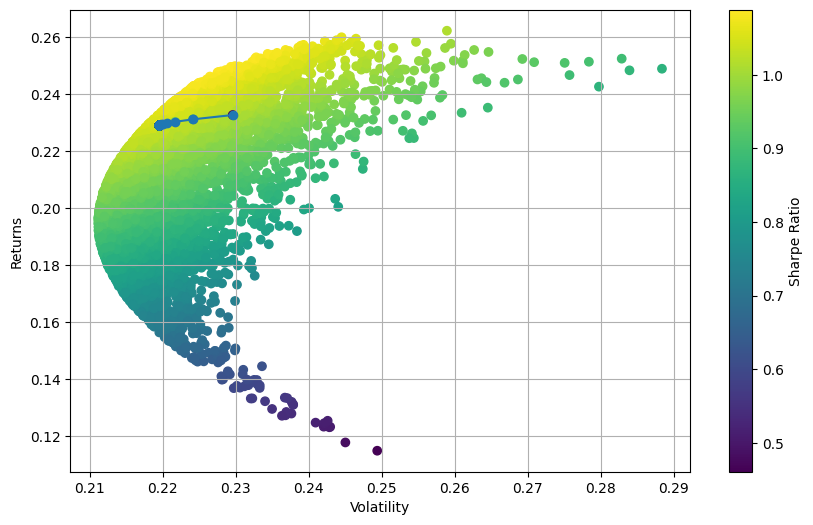

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_return(data):
  log_return = np.log(data/data.shift(1))[1:] #omitting 1st row as it is NaN
  return pd.DataFrame(log_return)

def annualStats(returns):
  num_trading_days=242
  print(returns.mean()*num_trading_days) #mu_i
  print(returns.cov()*num_trading_days)

class markowitz:
  def __init__(self,n,weights,data):
    self.n=n
    self.weights=np.array(weights)
    return_data=calculate_return(data)
    self.mean = return_data.mean()*242
    # self.variance=return_data.var()*242
    self.cov = return_data.cov()*242
    # self.ntd=ntd

  def show_mean_var(self):
    portfolio_return = np.dot(self.weights.T,self.mean)
    print(self.cov)
    portfolio_volatility = np.sqrt(np.dot(self.weights.T,np.dot(self.cov,self.weights)))
    print(portfolio_return)
    print(portfolio_volatility)

  def efficient_frontier(self,num_iters):
    random_weights=[]
    return_vector = []
    volatility_vector = []
    for i in range(0,num_iters):
      weights = np.random.random(self.n)
      weights = weights/np.sum(weights)
      random_weights.append(weights)
      return_vector.append(np.dot(weights.T,self.mean))
      volatility_vector.append(np.sqrt(np.dot(weights.T,np.dot(self.cov,weights))))
      #print(f"Iteration: {i}: Return: {return_vector[i]}, Volatility: {volatility_vector[i]}")


    plt.figure(figsize=(10,6))
    plt.scatter(volatility_vector,return_vector,c=(np.array(return_vector)/np.array(volatility_vector)),marker='o')
    plt.grid(True)
    plt.xlabel("Volatility")
    plt.ylabel("Returns")
    plt.colorbar(label="Sharpe Ratio")
    #plt.show()

  def grad_desc_sharpe(self,learning_rate,num_iters):
    w_int = np.random.random(self.n)
    w_int = w_int/np.sum(w_int)
    #w_int = np.zeros.zeros(self.n)
    weights = []
    weights.append(w_int)
    curr_wt=w_int
    return_vector = []
    volatility_vector = []
    return_vector.append(np.dot(curr_wt.T,self.mean))
    volatility_vector.append(np.sqrt(np.dot(curr_wt.T,np.dot(self.cov,curr_wt))))
    for i in range(1,num_iters):
      volatility = np.dot(curr_wt.T,np.dot(self.cov,curr_wt))
      mu = np.dot(curr_wt,self.mean)
      slope = self.mean/volatility - ((1/2*volatility**3)*(np.dot(curr_wt.T,np.dot(self.mean,np.dot(self.cov,curr_wt)))+np.dot(self.mean.T,np.dot(self.mean,np.dot(self.cov.T,curr_wt)))))
      #slope_2 = np.dot(curr_wt.T,self.mean) - np.dot(self.cov,curr_wt)
      new_wt = curr_wt + learning_rate*slope
      new_wt = new_wt/np.sum(new_wt)
      weights.append(new_wt)
      curr_wt=new_wt
      return_vector.append(np.dot(curr_wt.T,self.mean))
      volatility_vector.append(np.sqrt(np.dot(curr_wt.T,np.dot(self.cov,curr_wt))))

    self.efficient_frontier(10000)
    plt.scatter(volatility_vector,return_vector,c=(np.array(return_vector)/np.array(volatility_vector)),marker='o')
    plt.plot(volatility_vector,return_vector,linestyle='-',marker='o')

    # plt.grid(True)
    # plt.xlabel("Volatility")
    # plt.ylabel("Returns")
    # plt.colorbar(label="Sharpe Ratio")
    plt.show()



  # def calculateMean(self):
  #   return np.dot(self.w.T,self.returns)

  # def calculateRisk(self):
  #   return np.dot(self.std,)


calculate_return(market)

random=markowitz(4,[0.1,0.1,0.6,0.2],market)
random.show_mean_var()

#random.efficient_frontier(10000)

random.grad_desc_sharpe(0.05,10000)

Gradient Descent for max Sharpe Ratio: \\
$$
\frac{\partial f}{\partial w} = (w^\top \cdot E\cdot w)^{(-1/2)}\cdot r-((w^\top \cdot E\cdot w)^{(-(1+1/2))}/2\cdot w^\top \cdot r\cdot E\cdot w+(w^\top \cdot E^\top \cdot w)^{(-(1+1/2))}/2\cdot r^\top \cdot w\cdot E^\top \cdot w)
$$

## Applying Particle Swarm Optimisation to Sharpe Ratio
---
$$
\bar X_i^{t+1} = \bar V_i^{t} + a \bar P_i^{t} + b \bar G^{t}
\\ \bar G^t = \text{Global/Overall Best}
\\  \bar P_i^t = \text {Best for ith particle}
\\ \textbf{Update Rule: }
\\ \bar P_i^t =  \bar X_i^t, \text{ if } f(\bar X_i^t)< f(\bar P_i^t); \ \bar P_i^{t-1}, \ \text{else}
\\ \bar G^t = \min_{i \in N}(f(\bar P_i^t))
\\ f(\cdot) : \text{function to be minimised}
$$

SyntaxError: incomplete input (<ipython-input-1-0c179f3a0458>, line 1)

In [ ]:
print(calculate_return(market).var())
print(calculate_return(market).cov())

AAPL    0.000313
MSFT    0.000249
AMZN    0.000383
CSCO    0.000281
dtype: float64
          AAPL      MSFT      AMZN      CSCO
AAPL  0.000313  0.000158  0.000158  0.000136
MSFT  0.000158  0.000249  0.000164  0.000147
AMZN  0.000158  0.000164  0.000383  0.000126
CSCO  0.000136  0.000147  0.000126  0.000281


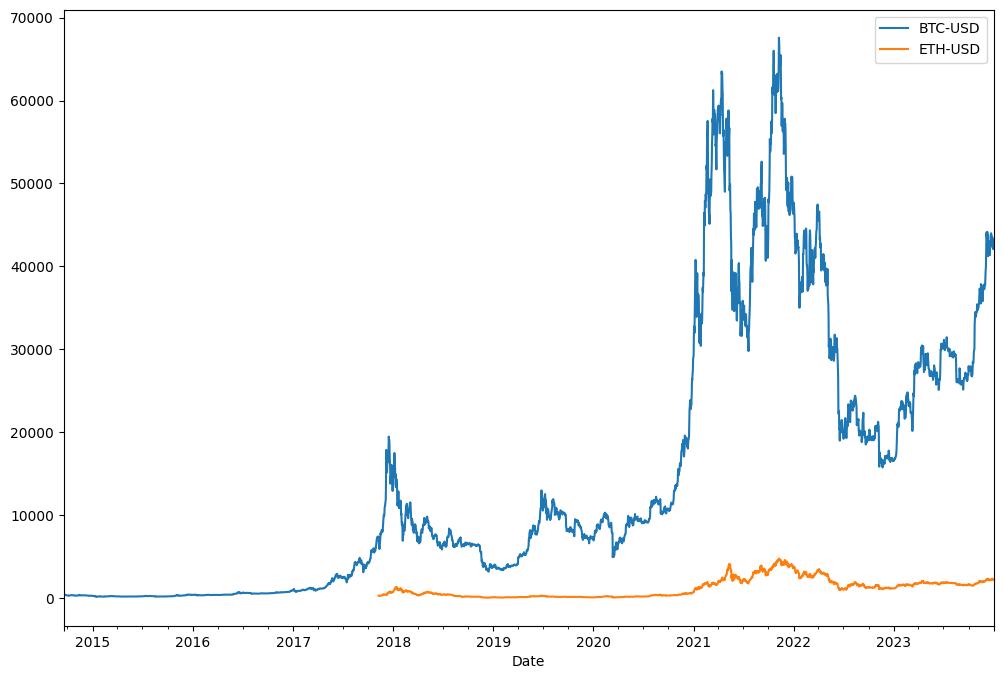

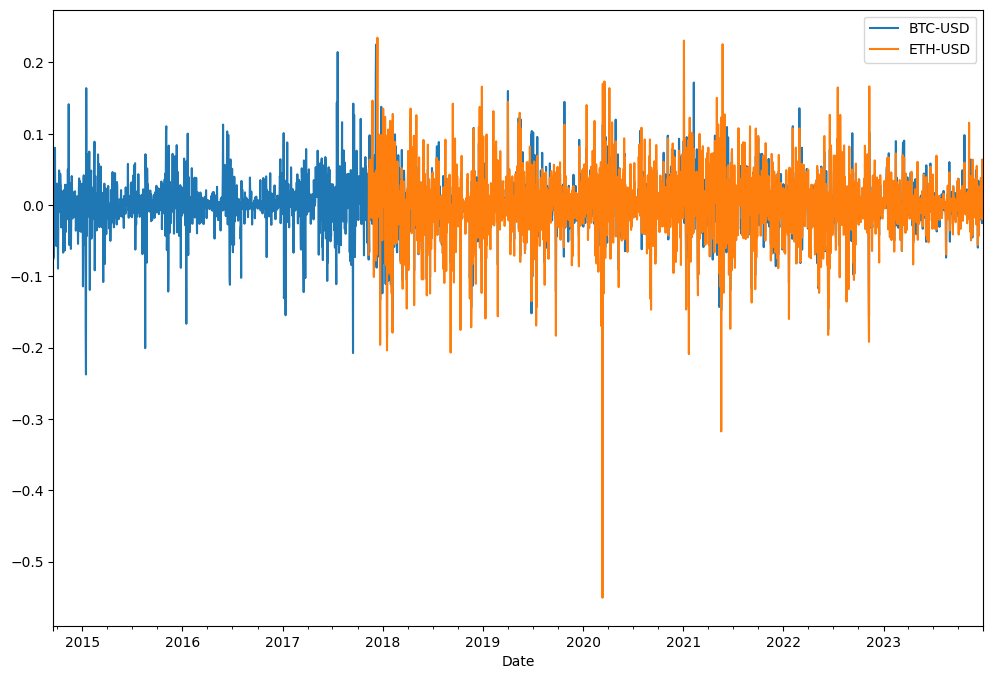

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

stocks = ['BTC-USD','ETH-USD']
start_date = '2010-01-01'
end_date = '2024-01-01'

def download_data():
  market = {}
  for stock in stocks:
    ticker = yf.Ticker(stock)
    market[stock]=ticker.history(start=start_date,end=end_date)['Close']
  return pd.DataFrame(market)

def calculateReturns(data):
  log_return = np.log(data/data.shift(1))
  return pd.DataFrame(log_return)

if __name__ == '__main__':
  market = download_data()
  market.plot(figsize=(12,8))
  plt.show()

  returns = calculateReturns(market)
  returns.plot(figsize=(12,8))
  plt.show()

# CAPM Model


# **Derivatives and Stochastic Models**

Stochastic Modelling of Stock Price
$$
dS = \mu Sdt + \sigma SdW
$$


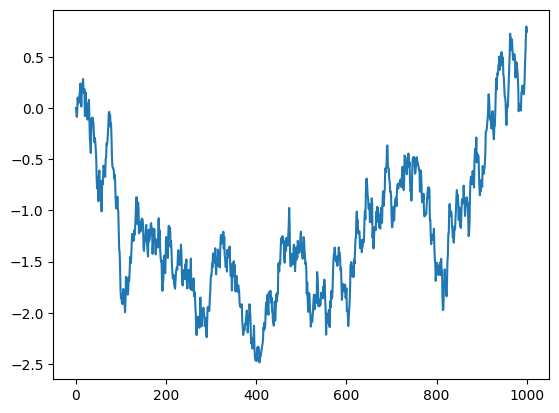

In [ ]:
import math
def weiner_process(dt=0.01,n=1000,x0=0):
  W = np.zeros(n+1)
  #The numpy. linspace() function creates an array of evenly spaced values over a specified interval.
  t = np.linspace(x0,n,n+1)
  W[1:n+1] = np.cumsum(np.random.normal(0,math.sqrt(dt),n))
  #cumsum adds the inside parameter(here random normal) to the previous iterator value
  #W[t+1]=W[t]+u~N(0,dt)
  return W

w = weiner_process()
plt.plot(w)

Down-side for weiner modeling of stock prices: Wdt allows negative values.

## Geometric Brownian Motion - Random Walk with drift
solving $ dS = \mu Sdt + \sigma SdW \ | \ dW \sim N(0,dt)   $
We get: \
$$
S(t) = S(0)e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t}
$$

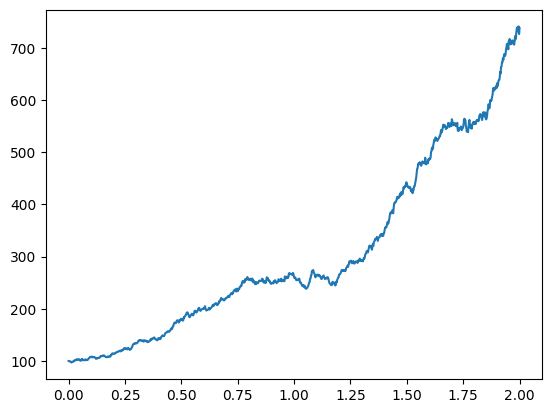

In [ ]:
def simulate_gbm(S0,T=2,N=1000,mu=1,sigma=0.2):
  dt = T/N
  t = np.linspace(0,T,N)
  W = np.zeros(N)
  W[1:N] = np.cumsum(np.random.normal(0,math.sqrt(dt),N-1))
  S = S0*np.exp((mu-(sigma**2)/2)*t+sigma*W)
  return t, S

t,S = simulate_gbm(100)
plt.plot(t,S)


# Monte Carlo Simulation


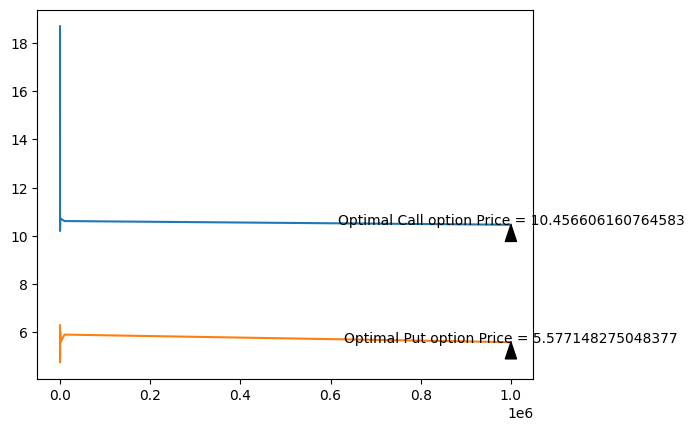

In [19]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt


class OptionPricing:

	def __init__(self,S0,E,T,rf,sigma):
		self.S0 = S0
		self.E = E
		self.T = T
		self.rf = rf
		self.sigma = sigma
		self.iterations = iterations

	def call_option_simulation(self,iterations):

		#we have 2 columns: first with 0s the second column will store the payoff
		#we need the first column of 0s: payoff function is max(0,S-E) for call option
		option_data = np.zeros([iterations, 2])

		#dimensions: 1 dimensional array with as many items as the itrations
		rand = np.random.normal(0, 1, [1, iterations])

		#equation for the S(t) stock price
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)

		#we need S-E because we have to calculate the max(S-E,0)
		option_data[:,1] = stock_price - self.E

		#average for the Monte-Carlo method
		#np.amax() returns the max(0,S-E) according to the formula
		average = np.sum(np.amax(option_data, axis=1))/float(iterations)



		#have to use the exp(-rT) discount factor
		return np.exp(-1.0*self.rf*self.T)*average

	def put_option_simulation(self,iterations):

		#we have 2 columns: first with 0s the second column will store the payoff
		#we need the first column of 0s: payoff function is max(0,E-S) for put option
		option_data = np.zeros([iterations, 2])

		#dimensions: 1 dimensional array with as many items as the itrations
		rand = np.random.normal(0, 1, [1, iterations])

		#equation for the S(t) stock price
		stock_price = self.S0*np.exp(self.T*(self.rf - 0.5*self.sigma**2)+self.sigma*np.sqrt(self.T)*rand)

		#we need E-S because we have to calculate the max(E-S,0)
		option_data[:,1] = self.E - stock_price

		#average for the Monte-Carlo method
		#np.amax() returns the max(0,E-S) according to the formula
		average = np.sum(np.amax(option_data, axis=1))/float(iterations)

		#have to use the exp(-rT) discount factor
		return np.exp(-1.0*self.rf*self.T)*average

	def simulate_iters(self, num_iters):
		call_opt = np.zeros(len(num_iters))
		put_opt = np.zeros(len(num_iters))
		for i in range (0,len(num_iters)):
			call_opt[i] = self.call_option_simulation(num_iters[i])
			put_opt[i] = self.put_option_simulation( num_iters[i])

		fig, ax = plt.subplots()

		ax.plot(num_iters,call_opt,label="Call Option Price")
		ax.plot(num_iters,put_opt,label="Put Option Price")
		plt.annotate(f'Optimal Call option Price = {call_opt[len(call_opt)-1]}', (num_iters[len(num_iters)-1],call_opt[len(call_opt)-1]),arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 8),
             horizontalalignment = 'center')
		plt.annotate(f'Optimal Put option Price = {put_opt[len(put_opt)-1]}', (num_iters[len(num_iters)-1],put_opt[len(put_opt)-1]),arrowprops = dict(facecolor = 'black', width = 0.2, headwidth = 8),
             horizontalalignment = 'center')
		plt.show()

if __name__ == "__main__":

	S0=100					#underlying stock price at t=0
	E=100					#strike price
	T = 1					#expiry
	rf = 0.05				#risk-free rate
	sigma=0.2				#volatility of the underlying stock
	iterations = 1000000	#number of iterations in the Monte-Carlo simulation

	model = OptionPricing(S0,E,T,rf,sigma)
	iters = [5,100,500,1000,10000,1000000]
	model.simulate_iters(iters)


In [12]:
iters = [5,100,500,1000,10000]
len(iters)

5